In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 데이터 불러오기
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### data preprocessing

#### handle missing value

In [2]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
# null, nan(NaN), na

In [4]:
titanic['age'].median()

np.float64(28.0)

In [5]:
# titanic['age'].isna() -> find na 
titanic.loc[titanic['age'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# age, embark_town, deck 등 결측 처리
titanic['age'].fillna(titanic['age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [7]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [9]:
# age, embark_town, deck 등 결측 처리
titanic['age'].fillna(titanic['age'].median(), inplace=True)

/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_5789/4194481025.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [10]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
titanic.loc[[0,890]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [12]:
# titanic.loc[index_list]

In [13]:
# titanic['embark_town'].isna() == True -> indexlist
titanic.loc[titanic['embark_town'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [14]:
titanic['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [15]:
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [16]:
titanic['embark_town'].mode() # series

0    Southampton
Name: embark_town, dtype: object

In [17]:
titanic['embark_town'].mode()[0]

'Southampton'

In [18]:
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_5789/2044417247.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


In [19]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [20]:
titanic.loc[titanic['deck'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [21]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

#### drop column

In [22]:
# 'deck'은 결측 비율이 높아 제거
titanic.drop(columns=['deck'], inplace=True)

In [23]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [25]:
titanic['survived'].unique()

array([0, 1])

In [26]:
titanic['alive'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
titanic.groupby(['alive','survived']).count()

,,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
alive,survived,,,,,,,,,,,,
no,0,549,549,549,549,549,549,549,549,549,549,549,549
yes,1,342,342,342,342,342,342,342,342,342,342,342,342


In [28]:
titanic.groupby(['pclass','class']).count()

/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_5789/1918808470.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['pclass','class']).count()


survived  sex  age  sibsp  parch  fare  embarked  who  \
pclass class                                                           
1      First        216  216  216    216    216   216       216  216   
       Second         0    0    0      0      0     0         0    0   
       Third          0    0    0      0      0     0         0    0   
2      First          0    0    0      0      0     0         0    0   
       Second       184  184  184    184    184   184       184  184   
       Third          0    0    0      0      0     0         0    0   
3      First          0    0    0      0      0     0         0    0   
       Second         0    0    0      0      0     0         0    0   
       Third        491  491  491    491    491   491       491  491   

               adult_male  embark_town  alive  alone  
pclass class                                          
1      First          216          216    216    216  
       Second           0            0      0      0  
       Third            0            0      0      0  
2      First            0            0      0      0  
       Second         184          184    184    184  
       Third            0            0      0      0  
3      First            0            0      0      0  
       Second           0            0      0      0  
       Third          491          491    491    491

In [29]:
titanic.groupby(['who','sex']).count()

survived  pclass  age  sibsp  parch  fare  embarked  class  \
who   sex                                                                  
child female        43      43   43     43     43    43        43     43   
      male          40      40   40     40     40    40        40     40   
man   male         537     537  537    537    537   537       537    537   
woman female       271     271  271    271    271   271       271    271   

              adult_male  embark_town  alive  alone  
who   sex                                            
child female          43           43     43     43  
      male            40           40     40     40  
man   male           537          537    537    537  
woman female         271          271    271    271

In [30]:
titanic.drop(columns=['alive','class','who'], inplace=True)

In [31]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,False,Southampton,True
888,0,3,female,28.0,1,2,23.4500,S,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,True,Cherbourg,True


#### label encoding -> change to numeric value

In [32]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   adult_male   891 non-null    bool   
 9   embark_town  891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 64.5+ KB


In [33]:
# sex, embarked, embark_town, alone 등 문자형 → 숫자형
label = LabelEncoder()
for col in ['sex', 'embarked', 'embark_town', 'alone']:
    titanic[col] = label.fit_transform(titanic[col])


In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int64  
 8   adult_male   891 non-null    bool   
 9   embark_town  891 non-null    int64  
 10  alone        891 non-null    int64  
dtypes: bool(1), float64(2), int64(8)
memory usage: 70.6 KB


In [35]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,2,True,2,0
1,1,1,0,38.0,1,0,71.2833,0,False,0,0
2,1,3,0,26.0,0,0,7.9250,2,False,2,1
3,1,1,0,35.0,1,0,53.1000,2,False,2,0
4,0,3,1,35.0,0,0,8.0500,2,True,2,1


#### EDA

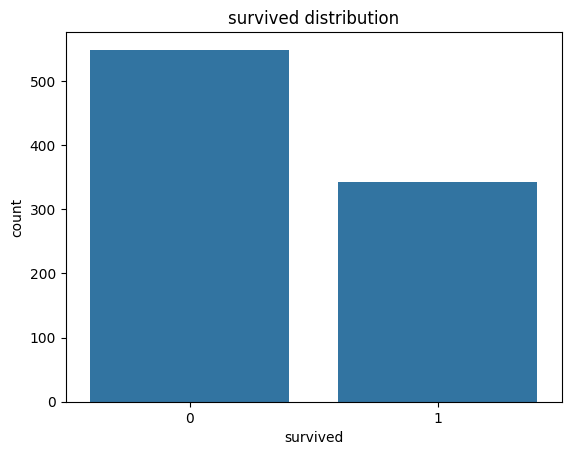

In [36]:
sns.countplot(x='survived', data=titanic)
plt.title("survived distribution")
plt.show()


In [37]:
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

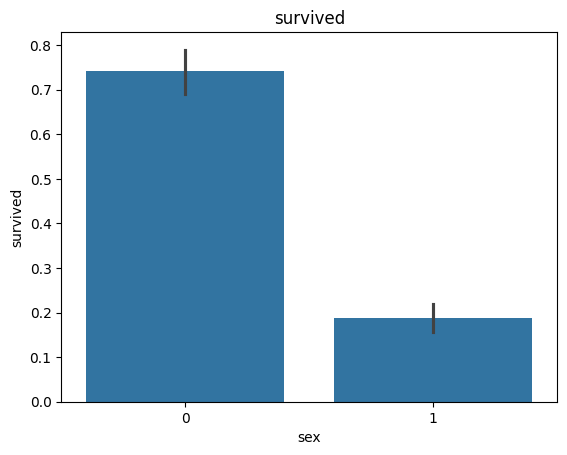

In [38]:
sns.barplot(x='sex', y='survived', data=titanic)
plt.title("survived")
plt.show()


/Users/eunahjung/Documents/pandaspractice/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eunahjung/Documents/pandaspractice/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eunahjung/Documents/pandaspractice/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eunahjung/Documents/pandaspractice/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


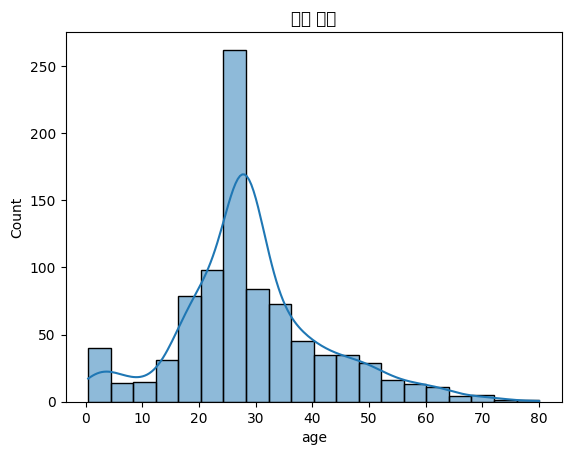

In [39]:
sns.histplot(titanic['age'], bins=20, kde=True)
plt.title("나이 분포")
plt.show()


/Users/eunahjung/Documents/pandaspractice/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eunahjung/Documents/pandaspractice/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eunahjung/Documents/pandaspractice/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eunahjung/Documents/pandaspractice/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eunahjung/Documents/pandaspractice/venv/lib/python3.

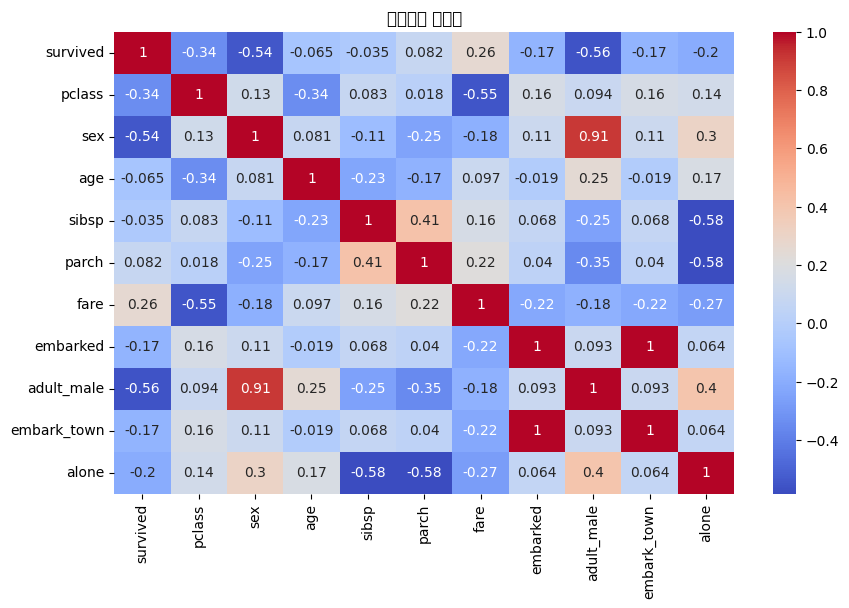

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')
plt.title("상관관계 히트맵")
plt.show()

In [41]:
titanic.drop(columns=['embarked','adult_male'], inplace=True)

In [42]:
# 죽은 사람 별로 데이터 카운트
# titanic.groupby('survived').count()

titanic['survived'].value_counts()/len(titanic)


survived
0    0.616162
1    0.383838
Name: count, dtype: float64

In [43]:
X = titanic.drop(columns='survived')
y = titanic['survived']

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
random_model = RandomForestClassifier(random_state=42)
random_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
from sklearn.metrics import precision_score, recall_score
y_pred = random_model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
# 정밀도와 재현율 계산
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.8268156424581006
Precision: 0.80
Recall: 0.77


In [48]:
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀 모델 생성
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
# 정밀도와 재현율 계산
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.7988826815642458
Precision: 0.77
Recall: 0.73


/Users/eunahjung/Documents/pandaspractice/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 생성 (K=3)
knn = KNeighborsClassifier(n_neighbors=4)

# 모델 훈련
knn.fit(X_train, y_train)

# 예측
y_pred = knn.predict(X_val)

# 정확도 평가
accuracy = accuracy_score(y_val, y_pred)
print(f'KNN 모델 정확도: {accuracy:.2f}')
# 정밀도와 재현율 계산
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

KNN 모델 정확도: 0.72
Precision: 0.81
Recall: 0.41


In [51]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'GaussianNB 모델 정확도: {accuracy:.2f}')


# 정밀도와 재현율 계산
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


GaussianNB 모델 정확도: 0.78
Precision: 0.71
Recall: 0.77


In [52]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# 정밀도와 재현율 계산
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.79
Precision: 0.76
Recall: 0.70


In [53]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# 정밀도와 재현율 계산
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.77
Precision: 0.71
Recall: 0.76


In [54]:
from sklearn.ensemble import GradientBoostingClassifier
# GBM 모델 생성
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# 모델 학습
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# 정밀도와 재현율 계산
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.82
Precision: 0.84
Recall: 0.69


In [56]:
!pip install xgboost

  Using cached xgboost-3.0.2-py3-none-macosx_10_15_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-macosx_10_15_x86_64.whl (2.2 MB)


In [57]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

# 모델 학습
xgb_model.fit(X_train, y_train)
# 예측
y_pred = xgb_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# 정밀도와 재현율 계산
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.82
Precision: 0.83
Recall: 0.72


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
# GBM 모델 생성
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
scores = cross_val_score(gbm, X, y, cv = 5)

print(scores)



[0.81005587 0.80898876 0.84269663 0.80898876 0.85955056]


numpy.ndarray

In [60]:

type(scores)

numpy.ndarray

In [61]:
scores.mean()

np.float64(0.8260561170045821)

In [ ]:
#KNN
scores = cross_val_score(knn, X, y, cv = 5)

print(scores,scores.mean())
print(scores.max()-scores.min())

[0.68156425 0.70224719 0.69101124 0.71910112 0.67977528] 0.694739815454146
0.0393258426966292


In [76]:
scores = cross_val_score(clf, X, y, cv = 5)

print(scores,scores.mean())
print(scores.max()-scores.min())

[0.73184358 0.80898876 0.79775281 0.74157303 0.80337079] 0.7767057937354843
0.07714518862594943


In [73]:
#SVC
scores = cross_val_score(model, X, y, cv = 5)

print(scores,scores.mean())
print(scores.max()-scores.min())

[0.80446927 0.80898876 0.78651685 0.75280899 0.78651685] 0.7878601468834348
0.0561797752808989


In [74]:
#GaussianNB
scores = cross_val_score(gnb, X, y, cv = 5)

print(scores,scores.mean())
print(scores.max()-scores.min())

[0.73184358 0.78651685 0.81460674 0.79213483 0.80337079] 0.7856945577804282
0.08276316615403934


In [ ]:
df.info() 

df.dtype 
df.size



In [ ]:
class DataFrame:
    def __init__(self, ):
        self.dtype
        self.size
    
    
    

In [ ]:
https://www.amazon.com/Skin1004-Madagascar-Centella-Asiatica-Ampoule/dp/B06Y15D1LH/ref=sr_1_1?crid=1OVDUI640NL4H&dib=eyJ2IjoiMSJ9.7y9uxywR5flyVQ6-bJQhFCZ3gYy7LxJs5DJcumVUwnmyj9KnC6xzn8PYIspNmk1BiUIVfwdONn78urdchdzVWjcNcXMn7t7hYdkKszqH2TmC4zSsujesKHABi6tFFH3Arjl_phVPhPbR79yYAAbfWWwT3fwWx193v1JSwrZvmbSdEBFv5thWIu0Cb9fGoDBVuv__78ZNZLMLZC6DgxdunFxR9so8Hyz_sjDNSIXX-iN-4GMg2Xi8ui1f9s4tuYBRi05vwKQOZVMHw3B8CUbGRHgrAz1ocAhfn7nvqyvNRh8.FkVJZ8EPpBW0LvVg8TUeOPVqHAXbifx3Hk8Yt6mbvXM&dib_tag=se&keywords=skin1004&qid=1749343718&sprefix=skin10%2Caps%2C342&sr=8-1&th=1

In [79]:
class Car:
    def __init__(self, brand, color):
        self.brand = brand  # 자동차 브랜드
        self.color = color  # 자동차 색상

    def drive(self):
        print(f"{self.color} 색상의 {self.brand} 자동차가 달립니다!")

# 자동차 객체(인스턴스) 만들기
car1 = Car("현대", "빨강")
car2 = Car("BMW", "파랑")

car1.drive()
car2.drive()

car1.color
car2.color
# car1.print() # x 
# list1.append()
# print()

빨강 색상의 현대 자동차가 달립니다!
파랑 색상의 BMW 자동차가 달립니다!


'파랑'